# Parametros

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats as stat
from scipy.stats import kstest, mannwhitneyu
#from sklearn.cluster import AffinityPropagation
#import prince
PATH_2210 = "..\DownloadAll\E01_T_DEU_CONS_2210\E01_T_DEU_CONS_2210.csv"
PATH_2211 = "..\DownloadAll\E01_T_DEU_CONS_2211\E01_T_DEU_CONS_2211.csv"
PATH_2212 = "..\DownloadAll\E01_T_DEU_CONS_2212\E01_T_DEU_CONS_2212.csv"
PATH_2301 = "..\DownloadAll\E01_T_DEU_CONS_2301\E01_T_DEU_CONS_2301.csv"
PATH_2302 = "..\DownloadAll\E01_T_DEU_CONS_2302\E01_T_DEU_CONS_2302.csv"
PATH_2303 = "..\DownloadAll\E01_T_DEU_CONS_2303\E01_T_DEU_CONS_2303.csv"
PATH_DICC = "..\DownloadAll\Diccionario T_DEU_CONS.xlsx"
BANCO_CODS = [39,27]
MONEDA_CODS = [1,2,3] # Peso chileno, UF y dolar

In [79]:
DICC_CODFAM = list(pd.read_excel(PATH_DICC, sheet_name='CODFAM')['CODIGO'])[1:]
DICC_CODTLP = list(pd.read_excel(PATH_DICC, sheet_name='CODTLP')['CODIGO'])
DICC_PROD = list(pd.read_excel(PATH_DICC, sheet_name='CODPRO')['CODIGO'])[1:]

# A futuro definimos esto segun columnas
umbral = {'R': 5, 'Y': 10}

# Lectura de datos

In [80]:
#dfdict = pd.read_excel('E01_T_DEU_CONS/Diccionario T_DEU_CONS.xlsx')
#df2210 = pd.read_csv(PATH_2210, delimiter=";")
#df2211 = pd.read_csv(PATH_2211,delimiter=";")
#df2212 = pd.read_csv(PATH_2212,delimiter=";")
#df2301 = pd.read_csv(PATH_2301,delimiter=";")
#df2302 = pd.read_csv(PATH_2302,delimiter=";")
#df2303 = pd.read_csv(PATH_2303,delimiter=";")

In [81]:
PATH_2303 = "..\E01_T_DEU_CONS_2303_REV.csv"
PATH_2302 = "..\E01_T_DEU_CONS_2302_REV.csv"

# Tests

In [82]:
df_2303 = pd.read_csv(PATH_2303,delimiter=";")
df_2302 = pd.read_csv(PATH_2302,delimiter=";")

In [145]:
def df_dropna(DataFrame,por=0):
    return DataFrame.dropna()
def df_fillna_mean(Dataframe,por=0):
    return Dataframe.fillna(value = Dataframe.mean())
def df_fillna_normal_mean(Dataframe,por=0):
    return Dataframe.fillna(value = np.random.normal(loc=Dataframe.mean(),scale=Dataframe.std()))
def df_fillna_dropna_mix(Dataframe,por=0):
    n = Dataframe.isna().sum(axis=0)
    if por == 0 or por *n < 1:
        n = 1
        por = 1
    aux_Dataframe = Dataframe.fillna(value = np.random.normal(loc=Dataframe.mean(),scale=1+Dataframe.std()),limit= int(por*n))
    return aux_Dataframe.dropna()
    

In [84]:
def Kolmogorov_condition(threshold,n,m):
    c_t = np.sqrt(-np.log(threshold/2)*0.5)
    print(c_t * np.sqrt((n+m)/(n*m)))
    return c_t * np.sqrt((n+m)/(n*m))


## Kolmogorov Test

In [85]:
def Kolmogorov_test(new_df,old_df,column,threshold,na_action=df_dropna,por=0):
    new_data = na_action(new_df[column],por)
    old_data = na_action(old_df[column],por)
    ks_statistic, p_value = kstest(new_data, old_data)
    size_n = len(new_data)
    size_m = len(old_data)
    condition = Kolmogorov_condition(threshold,size_n,size_m)
    if ks_statistic > condition:
        return("No Cumple",ks_statistic, p_value)
    return("Cumple",ks_statistic, p_value)


### MTOREV

In [86]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"MTOREV",0.05,df_dropna)

# Print the results

print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0012183755790419726
Resultado: Cumple
KS statistic: 7.82799114207311e-06
P-value: 1.0


### SALMD

In [87]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"SALMD",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0020158608281832307
Resultado: Cumple
KS statistic: 0.0013133521300898472
P-value: 0.41368197105958027


### GASTO

In [88]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"GASTO",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0011372034487550974
Resultado: Cumple
KS statistic: 0.00020811327687997316
P-value: 0.9999999781510335


### ULTXCO

In [89]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"ULTXCO",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0012429955624520448
Resultado: Cumple
KS statistic: 0.0
P-value: 1.0


### MTOVENC

In [90]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"MTOVENC",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0011372034487550974
Resultado: Cumple
KS statistic: 0.000700413714716297
P-value: 0.485888419712187


### TASAINT

In [151]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"TASAINT",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0011726535183523583
Resultado: No Cumple
KS statistic: 0.005865404493531123
P-value: 1.6544026819967021e-40


### SPROM

In [92]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"SPROM",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0020158608281832307
Resultado: No Cumple
KS statistic: 0.0031696446409908985
P-value: 0.00021844715595412782


### MTOCAST

In [93]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"MTOCAST",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0011372034487550974
Resultado: Cumple
KS statistic: 0.0005790794089005624
P-value: 0.7249993203779721


### CONTINGENTE

In [94]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"CONTINGENTE",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0015099491956910773
Resultado: Cumple
KS statistic: 0.0006766095907069225
P-value: 0.8524864791009314


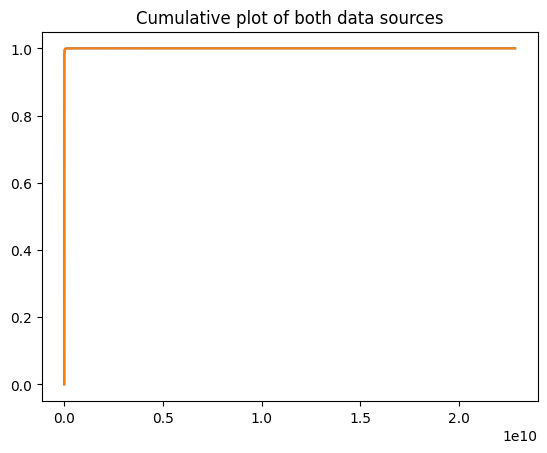

In [161]:
data_1 = df_dropna(df_2303["MTOCAST"],0.99)
data_2 = df_dropna(df_2302["MTOCAST"],0.99)
x = np.sort(data_1)
y = np.arange(len(x))/float(len(x))
plt.plot(x, y)
x2 = np.sort(data_2)
y2 = np.arange(len(x2))/float(len(x2))
plt.plot(x2, y2)
plt.title('Cumulative plot of both data sources')
plt.show()

## Mann-Whitney

In [96]:
def Mann_Whitney_Test(new_df,old_df,column,threshold,na_action=df_dropna,por=0):
    u_statistic, p_value = mannwhitneyu(na_action(new_df[column],por), na_action(old_df[column],por))
    if p_value < threshold:
        return("No Cumple",u_statistic, p_value)
    return("Cumple",u_statistic, p_value)


### MTOREV

In [97]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"MTOREV",0.05)

# Print the results

print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 3087722201550.5
P-value: 0.9950578062355421


### SALMD

In [98]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"SALMD",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: No Cumple
U statistic: 411564500510.5
P-value: 2.514248769429729e-06


### GASTO

In [99]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"GASTO",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 4067435878044.5
P-value: 0.673379873133851


### ULTXCO

In [100]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"ULTXCO",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 2850251302382.0
P-value: 1.0


### MTOVENC

In [101]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"MTOVENC",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 4065536614174.0
P-value: 0.1733179811086364


### TASAINT

In [102]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"TASAINT",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: No Cumple
U statistic: 3589420254157.0
P-value: 6.406484047016319e-07


### SPROM

In [103]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"SPROM",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 412613876675.0
P-value: 0.07254269011584882


### MTOCAST

In [104]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"MTOCAST",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 4070096759792.0
P-value: 0.3589258163150938


### CONTINGENTE

In [105]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"CONTINGENTE",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 1308047177614.0
P-value: 0.34061324045245256


In [106]:
def Tester(new_df,old_df,column,threshold,na_action=df_dropna,por = 0):
    KS_results = list(Kolmogorov_test(new_df,old_df,column,threshold,na_action,por))
    MW_results = list(Mann_Whitney_Test(new_df,old_df,column,threshold,na_action,por))
    return {"KS":KS_results,"MW":MW_results}





In [169]:
print(Tester(df_2303,df_2302,"CONTINGENTE",0.05,df_fillna_dropna_mix,0.001))

0.0015093737242151452
{'KS': ['Cumple', 0.0014358216758877385, 0.0709360847998225], 'MW': ['Cumple', 1310038693982.0, 0.33785650427248026]}


In [170]:
def get_value_of_every_list(list_of_lists,Test,value):
  """
  Takes a list of lists and returns a value of every list.

  Args:
    list_of_lists: A list of lists.

  Returns:
    A list of values.
  """

  values = list(map(lambda list_item: list_item[Test][value], list_of_lists))
  return values

In [172]:
x = np.linspace(0,1,1000)
y = [Tester(df_2303,df_2302,"CONTINGENTE",0.05,df_fillna_dropna_mix,i) for i in x]


0.0015099487290710025
0.0015093732581283777
0.001508797513556061
0.0015082226605830867
0.0015076482311993378
0.0015070746903815284
0.0015065015711866804
0.0015059293375396814
0.0015053575235606364
0.001504786592126561
0.0015042160784166094
0.0015036464442638566
0.0015030772259024955
0.001502508884125573
0.0015019409562183287
0.0015013739019376741
0.0015008072596159265
0.0015002414879777323
0.0014996761263985374
0.0014991116325745759
0.0014985475469204944
0.0014979840975587945
0.0014974215115868665
0.0014968593309710827
0.0014962980108531201
0.0014957370942288218
0.0014951770352247759
0.001494617377862439
0.0014940585752570728
0.0014935001724519126
0.0014929426215546343
0.0014923854686264377
0.0014918291647711371
0.001491273257064099
0.0014907181956089807
0.0014901635284915405
0.0014896097048189634
0.0014890562736836427
0.0014885039059630303
0.0014879517059773913
0.0014874003438643296
0.0014868493707183839
0.0014862990094132724
0.0014857494818367263
0.0014852003405753623
0.0014846520302

NameError: name 'get' is not defined

In [177]:
ks_r = get_value_of_every_list(y,"KS",1)
ks_c = get_value_of_every_list(y,"KS",0)

In [182]:
ks_r[-10:]


[0.43141166055979696,
 0.4316515091926064,
 0.4318781752123231,
 0.4321292905835925,
 0.432259628398873,
 0.4326400487476172,
 0.432894456418693,
 0.43144032475709737,
 0.4333791997533134,
 0.4336251556883636]

In [178]:
mw_r = get_value_of_every_list(y,"MW",1)
mw_c = get_value_of_every_list(y,"MW",0)

['Cumple',
 'Cumple',
 'No Cumple',
 'No Cumple',
 'No Cumple',
 'No Cumple',
 'No Cumple',
 'No Cumple',
 'No Cumple',
 'No Cumple']

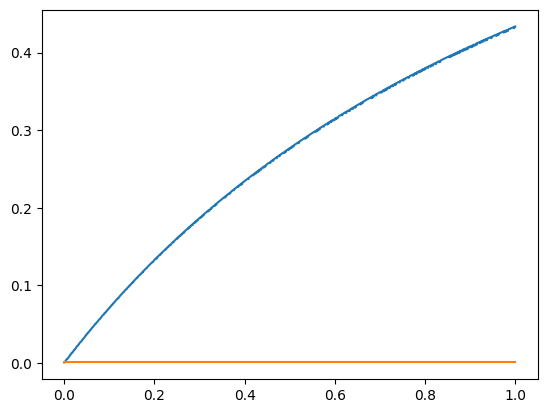

In [187]:
plt.plot(x,ks_r)
plt.plot(x,[ks_r[1] for i in ks_c])
plt.show()

In [190]:
for i in range(len(mw_c)):
    if mw_c[i] == "Cumple":
        print(i)

0
1
2
3
4
5
7
9
13
16
18
22
23
28
30
31
32
34
35
64


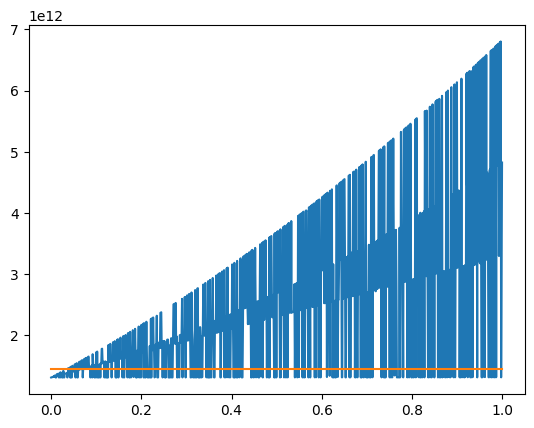

In [191]:
plt.plot(x,mw_r)
plt.plot(x,[mw_r[64] for i in mw_c])
plt.show()